In [37]:
## importing the libraries
import tensorflow as tf
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

In [2]:
## image preprocessing
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [3]:
## directories for training and testing images
train_dir='train'
test_dir='test'

In [4]:
## connecting the preprocessing object to the directory
## shuffle = False for the model,so that it can laern conveniently
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',batch_size=1,shuffle=False)
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),class_mode='categorical',batch_size=1,shuffle=False)

Found 41 images belonging to 4 classes.
Found 19 images belonging to 4 classes.


In [5]:
## making the model with Conv2D to extract features and maxpooling to take the important ones 
tf.random.set_seed(42)
model=keras.models.Sequential([
    keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(10,3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(4,activation='softmax')
])
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
history=model.fit(train_data,epochs=100,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/100
41/41 [==============================] - 2s 41ms/step - loss: 2.1217 - accuracy: 0.2439 - val_loss: 1.3723 - val_accuracy: 0.3158
Epoch 2/100
41/41 [==============================] - 1s 34ms/step - loss: 1.3773 - accuracy: 0.2927 - val_loss: 1.3458 - val_accuracy: 0.3158
Epoch 3/100
41/41 [==============================] - 1s 35ms/step - loss: 1.3307 - accuracy: 0.3415 - val_loss: 1.4119 - val_accuracy: 0.3684
Epoch 4/100
41/41 [==============================] - 1s 36ms/step - loss: 1.3682 - accuracy: 0.4146 - val_loss: 1.1101 - val_accuracy: 0.4737
Epoch 5/100
41/41 [==============================] - 1s 35ms/step - loss: 0.9704 - accuracy: 0.5610 - val_loss: 1.0309 - val_accuracy: 0.4737
Epoch 6/100
41/41 [==============================] - 1s 36ms/step - loss: 0.6734 - accuracy: 0.6341 - val_loss: 0.9627 - val_accuracy: 0.5263
Epoch 7/100
41/41 [==============================] - 1s 36ms/step - loss: 0.6096 - accuracy: 0.6829 - val_loss: 1.0065 - val_accuracy: 0.4737
Epoch 

41/41 [==============================] - 1s 36ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.5753 - val_accuracy: 0.5789
Epoch 59/100
41/41 [==============================] - 2s 38ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.5436 - val_accuracy: 0.5789
Epoch 60/100
41/41 [==============================] - 2s 37ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.6540 - val_accuracy: 0.5789
Epoch 61/100
41/41 [==============================] - 2s 37ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.6254 - val_accuracy: 0.5789
Epoch 62/100
41/41 [==============================] - 2s 38ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.6415 - val_accuracy: 0.5789
Epoch 63/100
41/41 [==============================] - 2s 38ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.6596 - val_accuracy: 0.5789
Epoch 64/100
41/41 [==============================] - 2s 38ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.7406 - val_accuracy: 0.5789
Epoch 65/100

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [7]:
df=pd.DataFrame(history.history)

<AxesSubplot:>

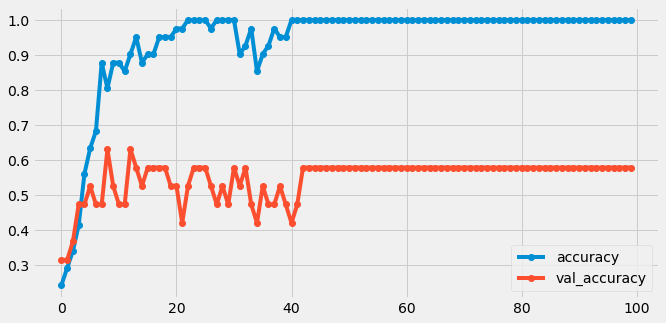

In [8]:
## val_accuracy is less because the dataset is small
df[['accuracy','val_accuracy']].plot(figsize=(10,5),marker='o')

<AxesSubplot:>

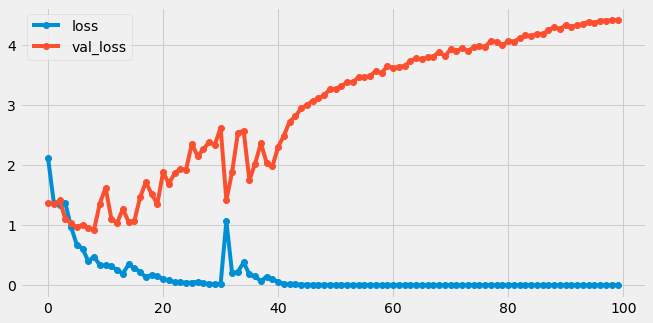

In [9]:
df[['loss','val_loss']].plot(figsize=(10,5),marker='o')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 100)               2

In [11]:
pred=model.predict(test_data)

In [12]:
import numpy as np 

In [13]:
y_pred=[]
for element in pred:
    y_pred.append(np.argmax(element))

In [14]:
y_pred

[2, 0, 2, 2, 2, 2, 0, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3]

In [15]:
y_test=test_data.labels
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3])

In [16]:
from sklearn.metrics import *

In [17]:
accuracy_score(y_test,y_pred)

0.5789473684210527

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.50      0.33      0.40         3
           2       0.55      1.00      0.71         6
           3       0.50      0.67      0.57         3

    accuracy                           0.58        19
   macro avg       0.64      0.57      0.53        19
weighted avg       0.70      0.58      0.54        19



In [22]:
import pathlib 
data_dir=pathlib.Path('train')
class_names=[item.name for item in data_dir.glob('*')]
print(class_names)

['bad-soya', 'bad-sunflower', 'good-soya', 'good-sunflower']


## Now ,predicting with our model

In [47]:
def load_predict(filename):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,(224,224))
    img=img/255.
    img=tf.expand_dims(img,axis=0)
    prediction=np.argmax(model.predict(img))
    data_dir=pathlib.Path('train')
    class_names=[item.name for item in data_dir.glob('*')]
    prediction=class_names[prediction]
    image=mpimg.imread(filename)
    plt.title(f"Prediction : {prediction}")
    plt.imshow(image)

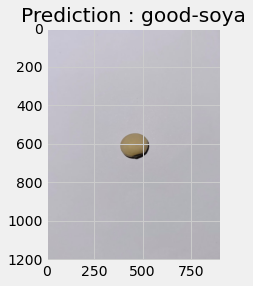

In [48]:
load_predict('WhatsApp Image 2022-07-02 at 3.35.55 PM (1).jpeg')